In [26]:
import pandas as pd

# Define the file path (make sure to use double backslashes or a raw string)
file_path = 'late.csv'

# Read the first 101 rows of the CSV file
data = pd.read_csv(file_path, nrows=81)

# Sum the 'Length' column of the first 101 rows
length_sum = data['Length'].sum()

print(f"The sum of the 'Length' column for the first 101 rows is: {length_sum}")


The sum of the 'Length' column for the first 101 rows is: 17255


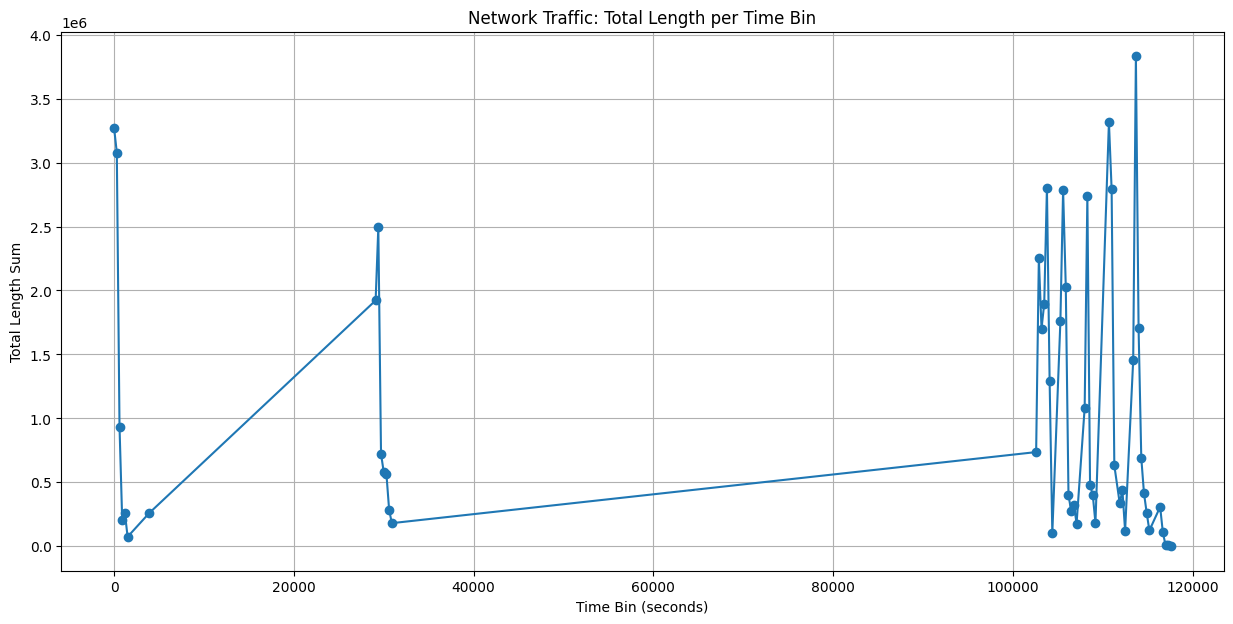

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated data from the CSV file
file_path = 'C:/Users/sebron2/Desktop/New folder/test8.csv'  # Make sure the path is correct
aggregated_data = pd.read_csv(file_path)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(aggregated_data['TimeBin'], aggregated_data['Total.Fwd.Packets'], marker='o', linestyle='-')
plt.title('Network Traffic: Total Length per Time Bin')
plt.xlabel('Time Bin (seconds)')
plt.ylabel('Total Length Sum')
plt.grid(True)
plt.show()


In [55]:
import pandas as pd
from datetime import datetime

# Read the dataset
file_path = 'data2.csv'  # Update this to the path where your CSV file is located
data = pd.read_csv(file_path, nrows=1000000)

# Convert timestamp strings to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y%H:%M:%S')

# Sort the data by timestamp just in case it's not in order
data.sort_values('Timestamp', inplace=True)

# Initialize the start time and bins
start_time = data['Timestamp'].iloc[0]
data['TimeBin'] = (data['Timestamp'] - start_time).dt.total_seconds() // 300 * 300

# Group by TimeBin and sum the Total.Fwd.Packets
aggregated_data = data.groupby('TimeBin')['Total.Fwd.Packets'].sum().reset_index()

# Convert the TimeBin back to a datetime offset from the start_time
aggregated_data['Timestamp'] = aggregated_data['TimeBin'].apply(lambda x: start_time + pd.Timedelta(seconds=x))

# Convert 'Timestamp' from datetime objects back to strings in the original format
aggregated_data['Timestamp'] = aggregated_data['Timestamp'].dt.strftime('%d/%m/%Y%H:%M:%S')

# Save the aggregated data to a new CSV file
output_file_path = 'C:/Users/sebron2/Desktop/New folder/test8.csv'  # Update this to where you want to save
aggregated_data.to_csv(output_file_path, index=False)

print(f'Aggregated data saved to {output_file_path}')


Aggregated data saved to C:/Users/sebron2/Desktop/New folder/test8.csv


In [35]:
import pandas as pd

# Define the file path
file_path = 'late.csv'  # Update this to the path where your CSV file is located

# Initialize variables
current_interval_limit = 60
length_sum = 0
aggregated_data = []

# Read the CSV file
data = pd.read_csv(file_path, nrows=117084)  # Only read the first 20000 rows

# Iterate over the rows
for index, row in data.iterrows():
    # Check if the time is within the current 10-second interval
    if row['Time'] < current_interval_limit:
        # Sum the 'Length' values
        length_sum += row['Length']
    else:
        # Once the 'Time' exceeds the interval, store the aggregated sum
        aggregated_data.append({'TimeBin': current_interval_limit, 'LengthSum': length_sum})
        # Reset the length sum for the next interval
        length_sum = row['Length']
        # Increase the interval limit to the next 10-second interval that includes the current time
        current_interval_limit = ((row['Time'] // 60) + 1) * 60

# Add the last interval if the loop ends before the interval is completed
if not aggregated_data or (aggregated_data[-1]['TimeBin'] != current_interval_limit):
    aggregated_data.append({'TimeBin': current_interval_limit, 'LengthSum': length_sum})

# Convert the list to a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Save the aggregated data to a new CSV file
output_file_path = 'C:/Users/sebron2/Desktop/New folder/min.csv'  # Update this to where you want to save
aggregated_df.to_csv(output_file_path, index=False)

print(f'Aggregated data saved to {output_file_path}')


Aggregated data saved to C:/Users/sebron2/Desktop/New folder/min.csv


In [51]:
import pandas as pd

# Replace 'path_to_your_dataset.csv' with the path to your actual dataset
file_path = 'C:/Users/sebron2/Desktop/New folder/test5.csv'

# Read the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime objects
# This assumes your timestamp format is like '26/04/201711:11:18' as per your example
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y%H:%M:%S')

# Sort the DataFrame by the 'Timestamp' column
data.sort_values('Timestamp', inplace=True)

# Reset the index of the DataFrame after sorting
data.reset_index(drop=True, inplace=True)

# Now data is sorted, and you can proceed with your further processing/aggregation

# Save the sorted data back to CSV if needed
sorted_file_path = 'C:/Users/sebron2/Desktop/New folder/sorted_test5.csv'
data.to_csv(sorted_file_path, index=False)


ValueError: time data "2017-04-26 03:03:25" doesn't match format "%d/%m/%Y%H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.